### Decision Tree

数学上如何使用信息论划分数据集

- 熵，为信息的期望值。而什么是信息？


- 信息，如果待分类的事务可能划分在多个分类之中，则符号$x_i$的信息定义为：${\color{red}{(放大信号,如下图)}}$
$$l(x_i)=-\log_2 p(x_i)$$   
其中$p(x_i)$是选择该分类的概率。



- 为了计算熵H，需要计算所有类别所有可能值包含的信息期望值：
$$H=-\sum_{i=1}^n\ p(x_i)\log_2 p(x_i)$$
其中n是分类的数目。

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

x=np.arange(0,1.2,0.001)
y=[-math.log(i,2) for i in x[1:]]
plt.plot(x[1:],y)
plt.plot(np.arange(-0.1,2,0.001),[0]*len(np.arange(-0.1,2,0.001)))
plt.plot([0]*len(np.arange(-0.1,10,0.001)),np.arange(-0.1,10,0.001))
plt.xlim(-1,10)

(-1, 10)

In [2]:
#计算信给定数据集的香农熵
def calcShannonEnt(dataSet):
    numEntries=len(dataSet)    #统计数据集中样本总数
    labelCounts={}
    for featVec in dataSet:    #逐行循环数据集
        currentLabel=featVec[-1]   #每个样本即每行的最后一元素是该样本的类别标签，用作字典的键，统计出现频率
        if currentLabel not in labelCounts.keys():   #如果当前循环的类别标签第一次出现，即初始化该键值对的值为0
            labelCounts[currentLabel]=0
        labelCounts[currentLabel]+=1     #每次将当前循环中列表标签的统计频数加1
    shannonEnt=0   #最后返回的香农熵值初始化0，用于后面循环的累加操作
    for key in labelCounts:    #循环所有类别标签
        prob=labelCounts[key]/numEntries  #统计每个类别标签出现的概率
        shannonEnt-=prob*math.log(prob,2) #根据公式通过累加操作计算香农熵
    return shannonEnt

In [3]:
#创建简单数据集
def createDataSet():
    dataSet=[[1,1,'yes'],[1,1,'yes'],[1,0,'no'],[0,1,'no'],[0,1,'no']]
    labels=['no surfacing','flippers']
    return dataSet,labels

In [4]:
myDat,labels=createDataSet()
print(myDat)
print(calcShannonEnt(myDat))

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]
0.9709505944546686


！！熵越高，则混合的数据也越多

In [5]:
#在数据集中添加更多的分类，观察熵的变化
#增加第三个名为maybe的分类
myDat[0][-1]='maybe'
print(myDat)
print(calcShannonEnt(myDat),'<- 看...高了吧')

[[1, 1, 'maybe'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]
1.3709505944546687 <- 看...高了吧


In [6]:
#按照给定特征划分数据集(抽取符合当前特征的当前取值的所有样本，返回列表已删除当前特征)
def splitDataSet(dataSet,axis,value):
    retDataSet=[]
    for featVec in dataSet:
        if featVec[axis]==value:
            reducedFeatVec=featVec[:axis]    #生成重组列表，删除当前循环中的特征
            reducedFeatVec.extend(featVec[axis+1:])    #添加参数列表的元素级别，可为操作列表的多元素添加
            retDataSet.append(reducedFeatVec)    #添加参数列表的整体作为操作列表的一个元素
    return retDataSet

In [7]:
#在简单样本数据上测试划分数据集函数splitDataSet()
myDat,labels=createDataSet()
print(myDat)
print(splitDataSet(myDat,0,1))
print(splitDataSet(myDat,0,0))

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]
[[1, 'yes'], [1, 'yes'], [0, 'no']]
[[1, 'no'], [1, 'no']]


In [8]:
#便利整个数据集，循环计算香农熵和splitDataSet()函数，找到最好的特征划分方式。
#熵计算将会告诉我们如何划分数据集是最好的数据组织方式
def chooseBestFeatureToSplit(dataSet):
    numFeatures=len(dataSet[0])-1   #特征属性数量，有类别标签，-1
    baseEntropy=calcShannonEnt(dataSet)
    bestInfoGain=0
    bestFeature=-1
    for i in range(numFeatures):
        featList=[example[i] for example in dataSet]  #dataSet是列表，所以要一个个元素级别循环取当前特征值
        uniqueVals=set(featList)
        newEntropy=0
        for value in uniqueVals:
            subDataSet=splitDataSet(dataSet,i,value)
            prob=len(subDataSet)/len(dataSet)
            newEntropy+=prob*calcShannonEnt(subDataSet)
        infoGain=baseEntropy-newEntropy
        if(infoGain>bestInfoGain):
            bestInfoGain=infoGain
            bestFeature=i
    return bestFeature

In [9]:
#测试实际输出结果
myDat,labels=createDataSet()
chooseBestFeatureToSplit(myDat)

0

In [10]:
print(calcShannonEnt(splitDataSet(myDat,0,1)),'+',calcShannonEnt(splitDataSet(myDat,0,0)),'=',calcShannonEnt(splitDataSet(myDat,0,1))+calcShannonEnt(splitDataSet(myDat,0,0)))

0.9182958340544896 + 0.0 = 0.9182958340544896


In [11]:
print(calcShannonEnt(splitDataSet(myDat,1,1)),'+',calcShannonEnt(splitDataSet(myDat,1,0)),'=',calcShannonEnt(splitDataSet(myDat,1,1))+calcShannonEnt(splitDataSet(myDat,1,0)))

1.0 + 0.0 = 1.0


工作原理：
    
    得到原始数据集，然后基于最好的属性值划分数据集，由于特征值可能多于两个，因此可能存在大于两个分支的数据集划分。第一次划分之后，数据将被向下传递到树分支的下一个节点，在这个节点上，可以再次划分数据。因此可以采用递归的原则处理数据集。
    
    递归结束的条件是：程序遍历完所有划分数据集的属性，或者每个分支下的所有实例都具有相同的分类。如果所有实例具有相同的分类，则得到一个叶子节点或者终止块。任何到达叶子节点的数据必然属于叶子节点的分类。

In [12]:
import operator
def majorityCnt(classList):
    classCount={}
    for vote in classList:
        if vote not in classCount.keys():
            classCount[vote]=0
        classCount[vote]+=1
    sortedClassCount=sorted(classCount.items(),key=operator.itimgetter(1),reverse=True)
    return sortedClassCount[0][0]

In [13]:
def createTree(dataSet,labels):      #输入参数：数据集和标签列表
    classList=[example[-1] for example in dataSet]       #取数据集每行最后一元素，即各样本的类别标签
    if classList.count(classList[0])==len(classList):    #如果按类计数结果=类别标签列表长度，即当前数据集全部属于同一类别
        return classList[0]         #返回当前类别标签当做叶子节点
    if len(dataSet[0])==1:          #当特征都用完的时候
        return majorityCnt(classList)       #选出现次数最多的类别作为返回值
    bestFeat=chooseBestFeatureToSplit(dataSet)   #选最优的划分特征的索引位
    bestFeatLabel=labels[bestFeat]  #返回最佳标签
    myTree={bestFeatLabel:{}}       #当前标签作为字典的键
    del(labels[bestFeat])           #删除标签列表中的最佳划分特征
    featValues=[example[bestFeat] for example in dataSet]   #取出当前最佳划分特征的所有取值
    uniqueVals=set(featValues)      #当前最佳划分特征的取值去重
    for value in uniqueVals:        #逐个循环
        subLabels=labels[:]         #列表复制，不改变原列表
        myTree[bestFeatLabel][value]=createTree(splitDataSet(dataSet,bestFeat,value),subLabels)   #决策树当前划分特征的值键=下个循环返回的结果
    return myTree  #返回整个决策树

In [14]:
myDat,labels=createDataSet()
createTree(myDat,labels)

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

In [15]:
#递归函数的labels 改sublabels，运行与不改并没有区别？？为什么
myDat,labels=createDataSet()
createTree(myDat,labels)

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

绘制树形图 Matplotlib

In [16]:
#注解 annotation
import matplotlib.pyplot as plt
decisionNode = dict(boxstyle="sawtooth", fc="0.8")
leafNode = dict(boxstyle="round4", fc="0.8")
arrow_args = dict(arrowstyle="<-")

def plotNode(nodeTxt,centerPt,parentPt,nodeType):
    createPlot.ax1.annotate(nodeTxt,xy=parentPt,xycoords='axes fraction',xytext=centerPt,textcoords='axes fraction',
                            va='center',ha='center',bbox=nodeType,arrowprops=arrow_args)   #bbox=nodeType不写这个，节点没有框框
    
def createPlot():
    fig=plt.figure(1,facecolor='white')
    fig.clf()
    createPlot.ax1=plt.subplot(111,frameon=False)
    plotNode(u'决策节点',(0.5,0.1),(0.1,0.5),decisionNode)
    plotNode('叶节点',(0.8,0.1),(0.3,0.8),leafNode)
    plt.show()

In [17]:
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
#有中文出现的情况，需要u'内容'

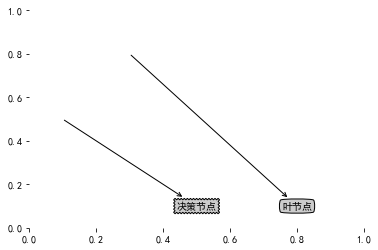

In [18]:
createPlot()

构造注解树

虽然有x、y坐标，但是如何放置所有的树节点却是个问题。必须知道有多少个节点，以确定x轴的长度；还需要知道树有多少层，以确定y轴高度。

这里定义两个新函数getNumLeafs()和getTreeDepth()，来获取叶节点的数目和树的层数。

In [19]:
#获取叶节点的数目和树的层数
def getNumLeafs(myTree):
    numLeafs=0    #初始化叶子节点计数
    firstStr=list(myTree.keys())[0]    #取当前树当前判断节点(字典)的键的第一个元素
    secondDict=myTree[firstStr]  #得到这个键对应的值，即当前判断节点的各分支总体情况
    for key in secondDict.keys(): #将各分支中的键逐个循环
        if type(secondDict[key]).__name__=='dict':   #如果分支中有字典类型，即判断节点
            numLeafs+=getNumLeafs(secondDict[key])   #进入该判断节点，递归查找该判断节点各分支节点的整体情况，直到遇见叶子节点计数加1后返回
        else: numLeafs+=1    #遇到叶子节点计数累加1
    return numLeafs    #返回叶子节点数

def getTreeDepth(myTree):   
    maxDepth=0    #初始化数的深度
    firstStr=list(myTree.keys())[0]   #树当前判断节点（字典）的键的第一个元素
    secondDict=myTree[firstStr] #得到当前判断节点的各分支总体情况
    for key in secondDict.keys():  #将各分支中的键逐个循环
        if type(secondDict[key]).__name__=='dict':  #如果是判断节点
            thisDepth=1+getTreeDepth(secondDict[key])  #计数1+后面判断节点个数：通过递归找分支中还有没有判断节点，直到没有再遇见判断节点即返回
        else: thisDepth=1
        if thisDepth>maxDepth:maxDepth=thisDepth
    return maxDepth    

In [20]:
#输出预先存储的树信息
def retrieveTree(i):
    listOfTrees=[{'no surfacing':{0:'no',1:{'flippers':{0:'no',1:'yes'}}}},
                {'no surfacing':{0:'no',1:{'flippers':{0:{'head':{0:'no',1:'yes'}},1:'no'}}}}]
    return listOfTrees[i]

In [21]:
retrieveTree(1)

{'no surfacing': {0: 'no',
  1: {'flippers': {0: {'head': {0: 'no', 1: 'yes'}}, 1: 'no'}}}}

In [22]:
list(retrieveTree(1))

['no surfacing']

In [23]:
myTree=retrieveTree(0)
getNumLeafs(myTree)

3

In [24]:
getTreeDepth(myTree)

2

In [25]:
#plotTree函数
#更新之前的createPlot()的部分代码
def plotMidText(cntrPt,parentPt,txtString):
    xMid=(parentPt[0]-cntrPt[0])/2+cntrPt[0]
    yMid=(parentPt[1]-cntrPt[1])/2+cntrPt[1]
    createPlot.ax1.text(xMid,yMid,txtString)
    
def plotTree(myTree,parentPt,nodeTxt):      #调用了plotMidText()
    numLeafs=getNumLeafs(myTree)            #
    depth=getTreeDepth(myTree)
    firstStr=list(myTree.keys())[0]
    cntrPt=(plotTree.xOff+(1+numLeafs)/2/plotTree.totalW,plotTree.yOff)   #判断节点坐标，根据叶子节点中心位置确定
    plotMidText(cntrPt,parentPt,nodeTxt)
    plotNode(firstStr,cntrPt,parentPt,decisionNode)
    secondDict=myTree[firstStr]
    plotTree.yOff=plotTree.yOff-1/plotTree.totalD   #叶子节点y轴数值
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':
            plotTree(secondDict[key],cntrPt,str(key))   #类型是字典，即判断节点，进入递归循环
        else:
            plotTree.xOff=plotTree.xOff+1/plotTree.totalW  #叶子节点x轴的设置
            plotNode(secondDict[key],(plotTree.xOff,plotTree.yOff),cntrPt,leafNode)
            plotMidText((plotTree.xOff,plotTree.yOff),cntrPt,str(key))
    plotTree.yOff=plotTree.yOff+1/plotTree.totalD
    
def createPlot(inTree):          #主函数，调用了plotTree()绘制图形的大部分工作
    fig=plt.figure(1,facecolor='white')
    fig.clf()
    axprops=dict(xticks=[],yticks=[])
    createPlot.ax1=plt.subplot(111,frameon=False,**axprops)
    plotTree.totalW=getNumLeafs(inTree)
    plotTree.totalD=getTreeDepth(inTree)
    plotTree.xOff=-0.5/plotTree.totalW
    plotTree.yOff=1
    plotTree(inTree,(0.5,1),'')
    plt.show()

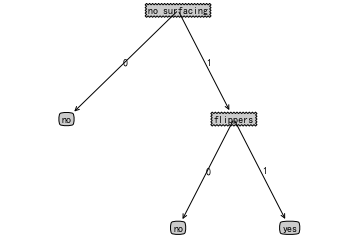

In [26]:
createPlot(myTree)

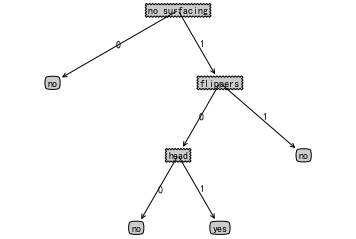

In [27]:
createPlot(retrieveTree(1))

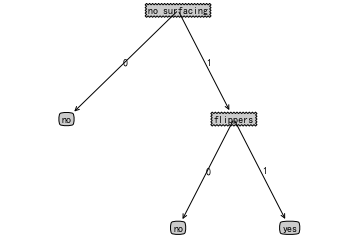

In [28]:
#晚点再研究下~~吧
fig=plt.figure(1,facecolor='white')
fig.clf()
axprops=dict(xticks=[],yticks=[])
createPlot.ax1=plt.subplot(111,frameon=False,**axprops)
plotTree.totalW=getNumLeafs(myTree)   #全局变量树宽度
plotTree.totalD=getTreeDepth(myTree)  #全局变量树深度
plotTree.xOff=-0.5/plotTree.totalW
plotTree.yOff=1

numLeafs=getNumLeafs(myTree)
depth=getTreeDepth(myTree)
firstStr=list(myTree.keys())[0]
cntrPt=(plotTree.xOff+(1+numLeafs)/2/plotTree.totalW , plotTree.yOff)

plotMidText(cntrPt,(0.5,1),'')
plotNode(firstStr,cntrPt,(0.5,1),decisionNode)
secondDict=myTree[firstStr]
plotTree.yOff=plotTree.yOff-1/plotTree.totalD

type(secondDict[0]).__name__
plotTree.xOff=plotTree.xOff+1/plotTree.totalW
plotNode(secondDict[0],(plotTree.xOff,plotTree.yOff),cntrPt,leafNode)
plotMidText((plotTree.xOff,plotTree.yOff),cntrPt,str(0))

type(secondDict[1]).__name__
# plotTree(secondDict[1],cntrPt,str(1))
numLeafs=getNumLeafs(secondDict[1]) 
depth=getTreeDepth(secondDict[1]) 
firstStr=list(secondDict[1].keys())[0]
cntrPt=(plotTree.xOff+(1+numLeafs)/2/plotTree.totalW,plotTree.yOff)
plotMidText(cntrPt,(0.5, 1),'1')
plotNode(firstStr,cntrPt,(0.5, 1),decisionNode)
secondDict=myTree['no surfacing'][1][firstStr]
plotTree.yOff=plotTree.yOff-1/plotTree.totalD

type(myTree['no surfacing'][1][firstStr][0]).__name__
plotTree.xOff=plotTree.xOff+1/plotTree.totalW
plotNode(secondDict[0],(plotTree.xOff,plotTree.yOff),cntrPt,leafNode)
plotMidText((plotTree.xOff,plotTree.yOff),cntrPt,str(0))

type(myTree['no surfacing'][1][firstStr][1]).__name__
plotTree.xOff=plotTree.xOff+1/plotTree.totalW
plotNode(secondDict[1],(plotTree.xOff,plotTree.yOff),cntrPt,leafNode)
plotMidText((plotTree.xOff,plotTree.yOff),cntrPt,str(1))

In [29]:
plotTree.xOff   #1/6

0.8333333333333333

In [30]:
plotTree.xOff  #3/6

0.8333333333333333

In [31]:
plotTree.xOff  #5/6

0.8333333333333333

In [32]:
5/6

0.8333333333333334

测试&存储分类器

使用决策树构建分类器，如何在实际应用中存储分类器。

In [33]:
#使用决策树的分类函数
def classify(inputTree,featLabels,testVec):
    firstStr=list(inputTree.keys())[0]     #取第一个节点，即第一个特征属性(判断节点)
    secondDict=inputTree[firstStr]
    featIndex=featLabels.index(firstStr)   #返回当前的划分特征值在标签列表中的索引位
    for key in secondDict.keys():       #将待分类测试向量在当前划分数据特征值对应索引位的值与各分支取值对比
        if testVec[featIndex]==key:     #如果相同且不是字典类型，即为叶节点，则返回当前节点标签 
            if type(secondDict[key]).__name__=='dict':    #如果还是判断节点(字典类型=特征属性)，则继续递归分类，直至到叶子节点(类别标签)
                classLabel=classify(secondDict[key],featLabels,testVec)
            else:
                classLabel=secondDict[key]   #到达非判断节点，即说明是叶子节点了，返回该属性对应key值(箭头上的text)的标签(叶子节点)
    return classLabel

In [34]:
myDat,labels=createDataSet()
print(labels)
print(myDat)
classify(myTree,labels,[1,0])

['no surfacing', 'flippers']
[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]


'no'

In [41]:
myTree

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

In [47]:
#使用算法：决策树的储存
#python模块pickle序列化对象，在磁盘上保存对象，并在需要的时候读取。(任何对象都可以执行序列化操作，字典对象也不例外)
def storeTree(inputTree,filename):
    import pickle
    fw=open(filename,'wb')
    pickle.dump(inputTree,fw)
    fw.close()
    
def grabTree(filename):
    import pickle
    fr=open(filename,'rb')
    return pickle.load(fr)

In [45]:
storeTree(myTree,'classifierStorage.txt')

In [48]:
grabTree('classifierStorage.txt')

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

使用决策树预测隐形眼镜类型

In [51]:
fr=open('Reference code\Ch03\lenses.txt')

In [52]:
lenses=[inst.strip().split('\t') for inst in fr.readlines()]

In [55]:
lenses[:5]

[['young', 'myope', 'no', 'reduced', 'no lenses'],
 ['young', 'myope', 'no', 'normal', 'soft'],
 ['young', 'myope', 'yes', 'reduced', 'no lenses'],
 ['young', 'myope', 'yes', 'normal', 'hard'],
 ['young', 'hyper', 'no', 'reduced', 'no lenses']]

In [56]:
lensesLabels=['age','prescript','astigmatic','tearRate']
lensesTree=createTree(lenses,lensesLabels)
lensesTree

{'tearRate': {'reduced': 'no lenses',
  'normal': {'astigmatic': {'no': {'age': {'pre': 'soft',
      'young': 'soft',
      'presbyopic': {'prescript': {'myope': 'no lenses', 'hyper': 'soft'}}}},
    'yes': {'prescript': {'myope': 'hard',
      'hyper': {'age': {'pre': 'no lenses',
        'young': 'hard',
        'presbyopic': 'no lenses'}}}}}}}}

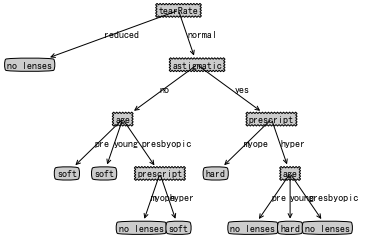

In [57]:
createPlot(lensesTree)